# Generate figures for the p63 MPRA paper Figure 2

In [22]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import os
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#set seaborn theme for nice figures
sns.set_theme(style="ticks",rc={"axes.spines.right": False, "axes.spines.top": False, 'font.size':10},
			  font='arial')
#import key tables
os.chdir('..\data')
fig_out_path = r'..\figures'
df = pd.read_excel('Table S3.xlsx', sheet_name='MCF10A_WT_p53KO')
df.sample(5)

,loc,enhancer_variant,cell_line,RNA/DNA,activity,obs_score,p63RE_class,strand,p63RE_type,gc,obs_p53
49298,chr15_62857799_62857813,fullShuffle,MCF10A,1.568788,Unchanged,8,tertiary,-,Unique p63RE,56.666667,NaN
6953,chr11_134041187_134041211,WT,MCF10A,1.287331,Unchanged,9,primary,-,Unique p63RE,48.333333,NaN
3223,chr1_89616444_89616468,WT,MCF10A,0.972704,Unchanged,13,primary,-,Unique p63RE,45.833333,NaN
79155,chr1_167669386_167669405,shuffle,MCF10A p53KO,1.237398,Unchanged,8,primary,+,p53RE+p63RE,58.823529,NaN
14058,chr8_126828178_126828197,mut,MCF10A,1.040252,Unchanged,13,primary,+,p53RE+p63RE,45.378151,NaN


# Figure 2.
- Correlation between p63 ChIP enrichment in MCF10A and MPRA activity
- Correlation between p63 ChIP enrichment in MCF10A and p63 binding observations
- Correlation between p63 binding observations and MPRA activity
- Enhancer activity of unique vs co-binding, WT and mut with total enhancer numbers as x-labels?
- Correlation between p53 ChIP enrichment in MCF10A and MPRA activity (co-binding only)
- Unique p63 observations and enhacner activity
- Western blot
- Cobinding enhancer activity in WT and KO and WT mut
- Unique vs co-binding activity in p53KO

In [26]:
#fig 2A need ths table that has MCF10A p63 ChIP-seq enrichment data
p63_chip = pd.read_csv('mcf10a_p53p63chromatin_enrichment_for_mpra.csv', usecols=['enhancer_variant', 'p63_log', 'p53_log','name'])
p63_chip.rename(columns={'name':'loc', 'p63_log':'p63_enh_log2','p53_log':'p53_enh_log2'}, inplace=True)
p63_chip.drop_duplicates(inplace=True)
p63_chip.sample(5)

,enhancer_variant,loc,p63_enh_log2,p53_enh_log2
8531,WT,chr5_32371093_32371112,10.947453,11.357067
6507,WT,chr1_234997446_234997460,12.692217,12.227046
14990,mut,chr19_50896681_50896700,11.876616,13.614758
19736,mut,chr8_3199683_3199702,12.007373,11.986709
20831,mut,chr6_157334129_157334153,11.346982,10.058296


In [27]:
#add chip enrichment information to the main table
p63_enr = df[df.cell_line == 'MCF10A'].merge(p63_chip, how='left', on=['loc','enhancer_variant'])
p63_enr.sample(5)

,loc,enhancer_variant,cell_line,RNA/DNA,activity,obs_score,p63RE_class,strand,p63RE_type,gc,obs_p53,p63_enh_log2,p53_enh_log2
9056,chr19_40611191_40611215,WT,MCF10A,2.231546,Unchanged,8,primary,-,Unique p63RE,65.000000,NaN,11.290167,11.277886
22659,chr6_74879520_74879544,shuffle,MCF10A,0.743508,Unchanged,15,primary,-,Unique p63RE,45.833333,NaN,NaN,NaN
31512,chr16_89150295_89150314,flankShuffle,MCF10A,2.077707,Activating,17,primary,+,p53RE+p63RE,56.302521,11.0,NaN,NaN
22367,chr14_70011285_70011304,shuffle,MCF10A,0.769974,Activating,15,primary,+,p53RE+p63RE,46.218487,26.0,NaN,NaN
49282,chr15_47359079_47359103,fullShuffle,MCF10A,0.721997,Unchanged,8,primary,+,Unique p63RE,40.833333,NaN,NaN,NaN


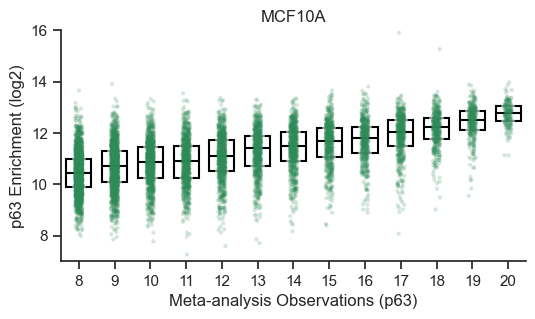

In [5]:
p63_enrh_wt = p63_enr[p63_enr.enhancer_variant == 'WT']
fig, ax = plt.subplots(figsize=(6,3))
sns.boxplot(data=p63_enrh_wt, x='obs_score', y='p63_enh_log2', order = sorted(p63_enrh_wt.obs_score.unique()),
			showfliers = False,color='white',whis=False, width=0.7, ax=ax, boxprops={'edgecolor':'black'}, medianprops={'color':'black'}, meanprops={'color':'black'})
sns.stripplot(data=p63_enrh_wt, x='obs_score', y='p63_enh_log2',color="seagreen", order = sorted(p63_enrh_wt.obs_score.unique()),ax=ax,
			  alpha=0.2, size=3).set(xlabel = 'Meta-analysis Observations (p63)', title='MCF10A',ylabel='p63 Enrichment (log2)',ylim=(7,16))
fig.savefig(os.path.join(fig_out_path,'2A.pdf'), dpi=300, transparent=True, bbox_inches='tight')

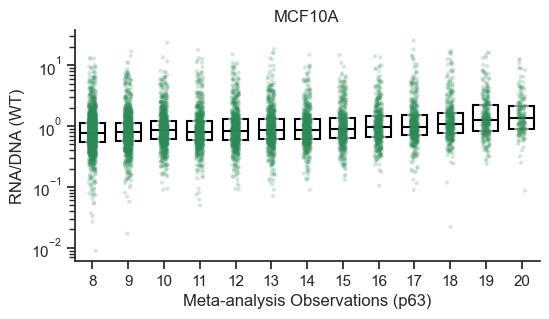

In [7]:
#Figure 2B.
df_p63_wt = df[(df.cell_line == 'MCF10A') & (df.enhancer_variant == 'WT')]
fig, ax = plt.subplots(figsize=(6,3))
sns.boxplot(data=df_p63_wt, x='obs_score', y='RNA/DNA', order = sorted(df_p63_wt.obs_score.unique()),
			showfliers = False,color='white',whis=False, width=0.7, ax=ax, boxprops={'edgecolor':'black'}, medianprops={'color':'black'}, meanprops={'color':'black'})
sns.stripplot(x='obs_score', y='RNA/DNA', data=df_p63_wt, color="seagreen", order = sorted(df_p63_wt.obs_score.unique()),ax=ax,
			  alpha=0.2, size=3).set(yscale='log',xlabel = 'Meta-analysis Observations (p63)', ylabel = 'RNA/DNA (WT)', title='MCF10A')
fig.savefig(os.path.join(fig_out_path,'2B.pdf'), dpi=300, transparent=True, bbox_inches='tight')

In [28]:
#add spearman's correlation to fig 2
spear_wt = stats.spearmanr(p63_enr[p63_enr.enhancer_variant == 'WT']['RNA/DNA'], p63_enr[p63_enr.enhancer_variant == 'WT']['p63_enh_log2'], nan_policy='omit')
spear_mut = stats.spearmanr(p63_enr[p63_enr.enhancer_variant == 'mut']['RNA/DNA'], p63_enr[p63_enr.enhancer_variant == 'mut']['p63_enh_log2'], nan_policy='omit')
print(spear_wt,spear_mut)

SignificanceResult(statistic=0.12446169267710816, pvalue=4.405467674334399e-36) SignificanceResult(statistic=0.00564108399576218, pvalue=0.5712317226997872)


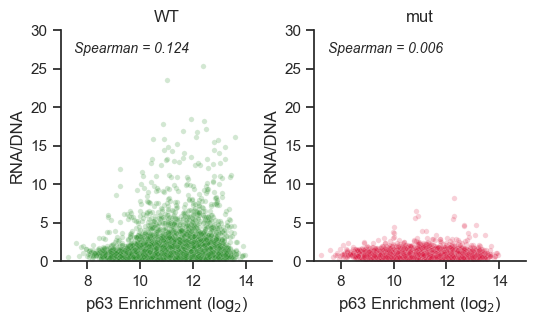

In [29]:
fig, (ax,ax1) = plt.subplots(1,2,figsize=(6,3))
sns.scatterplot(data=p63_enr[p63_enr.enhancer_variant == 'WT'], x='p63_enh_log2', y='RNA/DNA',ax=ax, color = 'forestgreen',alpha=0.2,s=15).set(xlim=(7,15), ylim=(0,30), xlabel='p63 Enrichment (log$_{2}$)', title='WT')
sns.scatterplot(data=p63_enr[p63_enr.enhancer_variant == 'mut'], x='p63_enh_log2', y='RNA/DNA',ax=ax1, color = 'crimson',alpha=0.2,s=15).set(xlim=(7,15), ylim=(0,30), xlabel='p63 Enrichment (log$_{2}$)', title='mut')
ax.text(7.5, 27, 'Spearman = ' + str(round(spear_wt.correlation, ndigits=3)), style='italic')
ax1.text(7.5, 27, 'Spearman = ' + str(round(spear_mut.correlation, ndigits=3)), style='italic')
fig.savefig(os.path.join(fig_out_path,'2C.pdf'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p53RE+p63RE_WT vs. p53RE+p63RE_mut: Wilcoxon test (paired samples), P_val:0.000e+00 Stat=1.329e+06
Unique p63RE_WT vs. Unique p63RE_mut: Wilcoxon test (paired samples), P_val:3.119e-40 Stat=5.798e+06


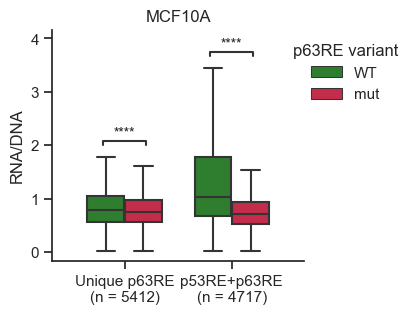

In [10]:

df_long_mcf = df[(df.cell_line == 'MCF10A') & ((df.enhancer_variant == 'WT') | (df.enhancer_variant == 'mut'))]
fig, ax = plt.subplots(figsize=(3.25,3))
# sns.set_context(rc={"xtick.labelsize":10})
cols = {'WT':'forestgreen', 'mut':'crimson'}
compare = [[('Unique p63RE', 'WT'),('Unique p63RE', 'mut')], [('p53RE+p63RE','WT'),('p53RE+p63RE','mut')]]
sns.boxplot(data = df_long_mcf, x = 'p63RE_type',y = 'RNA/DNA',hue = 'enhancer_variant', width=0.7, palette = cols, showfliers = False, ax=ax).set(xlabel=None,title='MCF10A')
annotator = Annotator(pairs = compare, data = df_long_mcf, x = 'p63RE_type', y = 'RNA/DNA', hue = 'enhancer_variant', ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.9, 1))
ax.set_xticklabels(['Unique p63RE\n(n = ' + str(df_long_mcf[df_long_mcf.p63RE_type == 'Unique p63RE']['loc'].nunique()) + ')',
					'p53RE+p63RE\n(n = ' + str(df_long_mcf[df_long_mcf.p63RE_type == 'p53RE+p63RE']['loc'].nunique()) + ')'])
fig.savefig(os.path.join(fig_out_path,'2D.eps'), dpi=300, transparent=True, bbox_inches='tight')

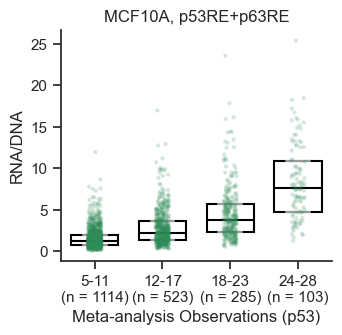

In [13]:
def bins(number):
	bin_range = {'5-11':list(range(5,12)), '12-17':list(range(12,18)),
	'18-23':list(range(18,24)), '24-28':list(range(24,29))}
	for k,v in bin_range.items():
		if number in v:
			return k
			break
x_order=['5-11','12-17', '18-23','24-28']
# sns.set_context(rc={"xtick.labelsize":12})
df_mcf_wt = df[(df.enhancer_variant == 'WT') & (df.cell_line == 'MCF10A') & (df.p63RE_type == 'p53RE+p63RE') & (~df.obs_p53.isna())]
df_mcf_wt['obs_bin_p53'] = df_mcf_wt.obs_p53.apply(lambda x: bins(x))
fig, ax = plt.subplots(figsize=(3.5,3))
sns.boxplot(data = df_mcf_wt, x = 'obs_bin_p53',y = 'RNA/DNA', order=x_order, width=0.7, color = 'white', whis=False,ax = ax,
			boxprops={'edgecolor':'black'}, medianprops={'color':'black'}, meanprops={'color':'black'}, showfliers = False)
sns.stripplot(x='obs_bin_p53', y='RNA/DNA', data=df_mcf_wt, order=x_order, color = "seagreen",ax = ax,
			  alpha=0.2, size=3).set(xlabel = 'Meta-analysis Observations (p53)', title='MCF10A, p53RE+p63RE')
counts = df_mcf_wt.value_counts(subset='obs_bin_p53').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in x_order], size = 11)
fig.savefig(os.path.join(fig_out_path,'2E.pdf'), dpi=300, transparent=True, bbox_inches='tight')

In [30]:
#add spearman's correalation to fig 2F
spear_wt = stats.spearmanr(p63_enr[p63_enr.enhancer_variant == 'WT']['RNA/DNA'], p63_enr[p63_enr.enhancer_variant == 'WT']['p53_enh_log2'], nan_policy='omit')
spear_mut = stats.spearmanr(p63_enr[p63_enr.enhancer_variant == 'mut']['RNA/DNA'], p63_enr[p63_enr.enhancer_variant == 'mut']['p53_enh_log2'], nan_policy='omit')
print(spear_wt,spear_mut)

SignificanceResult(statistic=0.4119976705173375, pvalue=0.0) SignificanceResult(statistic=0.1039618257070849, pvalue=1.2678188115016426e-25)


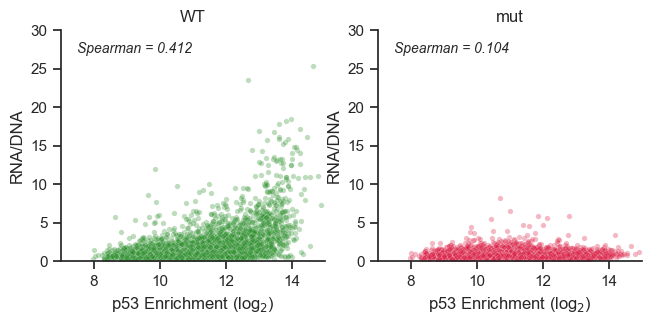

In [31]:
fig, (ax,ax1) = plt.subplots(1,2,figsize=(7.5,3))
sns.scatterplot(data=p63_enr[p63_enr.enhancer_variant == 'WT'], x='p53_enh_log2', y='RNA/DNA',ax=ax, color = 'forestgreen',alpha=0.3,s=15).set(xlim=(7,15), ylim=(0,30), xlabel='p53 Enrichment (log$_{2}$)', title='WT')
sns.scatterplot(data=p63_enr[p63_enr.enhancer_variant == 'mut'], x='p53_enh_log2', y='RNA/DNA',ax=ax1, color = 'crimson',alpha=0.3,s=15).set(xlim=(7,15), ylim=(0,30), xlabel='p53 Enrichment (log$_{2}$)', title='mut')
ax.text(7.5, 27, 'Spearman = ' + str(round(spear_wt.correlation, ndigits=3)), style='italic')
ax1.text(7.5, 27, 'Spearman = ' + str(round(spear_mut.correlation, ndigits=3)), style='italic')
fig.savefig(os.path.join(fig_out_path,'2F.pdf'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WT_MCF10A vs. WT_MCF10A p53KO: Wilcoxon test (paired samples), P_val:1.157e-110 Stat=3.473e+06
WT_MCF10A p53KO vs. mut_MCF10A p53KO: Wilcoxon test (paired samples), P_val:9.161e-304 Stat=2.079e+06


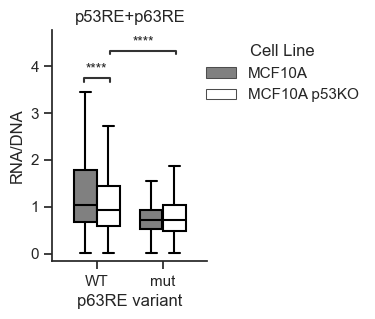

In [19]:
df_mcf_pko_both = df[(df.p63RE_type == 'p53RE+p63RE') & ((df.enhancer_variant == 'WT') | (df.enhancer_variant == 'mut'))]
cols = {'MCF10A':'grey', 'MCF10A p53KO':'white'}
compare = [[('WT', 'MCF10A p53KO'),('mut', 'MCF10A p53KO')],
			[('WT', 'MCF10A'),('WT', 'MCF10A p53KO')]]
fig, ax = plt.subplots(figsize=(2,3))
sns.boxplot(data = df_mcf_pko_both, x = 'enhancer_variant',y = 'RNA/DNA', hue='cell_line', width=0.7, palette=cols, showfliers = False, ax = ax,
			boxprops={'edgecolor':'black'}, medianprops={'color':'black'}, meanprops={'color':'black'}, whiskerprops={'color':'black'}, capprops={'color':'black'}).set( xlabel='p63RE variant', title = 'p53RE+p63RE')
annotator = Annotator(pairs = compare, data = df_mcf_pko_both, x = 'enhancer_variant',y = 'RNA/DNA', hue='cell_line', ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'Cell Line')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.9, 1))
fig.savefig(os.path.join(fig_out_path,'2H.eps'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Unique p63RE vs. p53RE+p63RE: Mann-Whitney-Wilcoxon test two-sided, P_val:2.546e-15 U_stat=1.160e+07


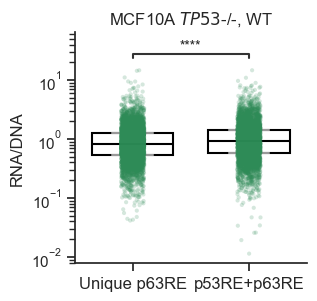

In [7]:
df_pko = df[(df.cell_line == 'MCF10A p53KO') & (df.enhancer_variant == 'WT')]
compare = [('p53RE+p63RE', 'Unique p63RE')]
sns.set_context(rc={"xtick.labelsize":12})
fig, ax = plt.subplots(figsize=(3,3))
sns.boxplot(data = df_pko, x = 'p63RE_type',y = 'RNA/DNA', width=0.7, color='white', showfliers = False, whis=False, ax = ax,
			boxprops={'edgecolor':'black'}, medianprops={'color':'black'}, meanprops={'color':'black'})
sns.stripplot(data = df_pko, x = 'p63RE_type',y = 'RNA/DNA', color = "seagreen",ax = ax,
			  alpha=0.2, size=3).set( yscale='log',xlabel=None, title='MCF10A $\it{TP53}$-/-, WT')
annotator = Annotator(pairs = compare, data = df_pko, x = 'p63RE_type',y = 'RNA/DNA', ax=ax)
annotator.configure(test = "Mann-Whitney").apply_and_annotate()
fig.savefig(os.path.join(fig_out_path,'2I.pdf'), dpi=300, transparent=True, bbox_inches='tight')